In [2]:
import pandas as pd
import json

In [15]:
query_result = json.load(open('../dynamodb/query_result.json'))
df=pd.DataFrame(items['Items'])

In [16]:
df.head()

,entity_id,park_id,posted_wait_minutes,response_timestamp,single_rider_is_available,single_rider_wait_minutes,status,type
0,{'S': 'P1NA10'},{'S': '0/P/P1'},{'N': '115'},{'S': '2020-02-22T11:46:24.006+0000'},{'BOOL': False},{'N': '-1'},{'S': 'OPERATING'},{'S': 'Attraction'}
1,{'S': 'P1NA10'},{'S': '0/P/P1'},{'N': '90'},{'S': '2020-02-19T16:41:12.082+0000'},{'BOOL': False},{'N': '-1'},{'S': 'OPERATING'},{'S': 'Attraction'}
2,{'S': 'P1NA10'},{'S': '0/P/P1'},{'N': '90'},{'S': '2020-02-21T11:45:39.517+0000'},{'BOOL': False},{'N': '-1'},{'S': 'OPERATING'},{'S': 'Attraction'}
3,{'S': 'P1NA10'},{'S': '0/P/P1'},{'N': '55'},{'S': '2020-02-20T17:26:28.063+0000'},{'BOOL': False},{'N': '-1'},{'S': 'OPERATING'},{'S': 'Attraction'}
4,{'S': 'P1NA10'},{'S': '0/P/P1'},{'N': '70'},{'S': '2020-02-24T11:06:11.849+0000'},{'BOOL': False},{'N': '-1'},{'S': 'OPERATING'},{'S': 'Attraction'}


In [17]:
df.posted_wait_minutes = df.posted_wait_minutes.astype('str').str.extract(r'\D*(?P<minutes>\d*)\D*').astype('int')
df.response_timestamp = df.response_timestamp.astype('str').str.extract(r'\D*(?P<minutes>[0-9-:.+T]*)\D*')
df=df.set_index('response_timestamp')
df=df.sort_values(by=['response_timestamp'])

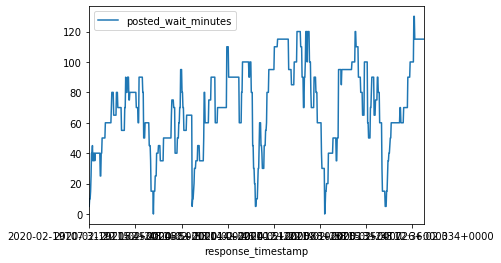

In [19]:
df.plot(y='posted_wait_minutes')